# **PORTFOLIO OPTIMIZATION**

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

**I have assumed 5 stocks here for my portfolio**

**For calculating the optimized weights, we have taken a training period from 1st April 2015 to 31st March 2017**

In [ ]:
assets = ['HCLTECH.NS','WIPRO.NS','INFY.NS','TCS.NS','MPHASIS.NS']

stockStartDate='2015-04-01'

stockEndDate='2017-03-31'


In [ ]:
#Assign weights to stocks.
weights = np.array([0.2,0.2,0.2,0.2,0.2])


In [ ]:
df = pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate,end = stockEndDate)['Adj Close']

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df

,HCLTECH.NS,WIPRO.NS,INFY.NS,TCS.NS,MPHASIS.NS
Date,,,,,
2015-04-01,401.125000,218.195862,413.400604,1092.188232,322.927979
2015-04-06,397.373199,214.043320,414.209229,1094.190063,321.979156
2015-04-07,398.439117,211.941757,410.653229,1110.384155,323.794312
2015-04-08,408.799194,212.372726,418.459686,1134.610352,321.731659
2015-04-09,411.058868,212.664932,421.207123,1144.558716,319.462769
...,...,...,...,...,...
2017-03-27,409.103699,187.099182,456.600006,1115.065918,534.632629
2017-03-28,412.824402,188.416779,459.395905,1123.331299,533.830505
2017-03-29,421.321838,190.162048,457.931366,1130.108521,531.335388


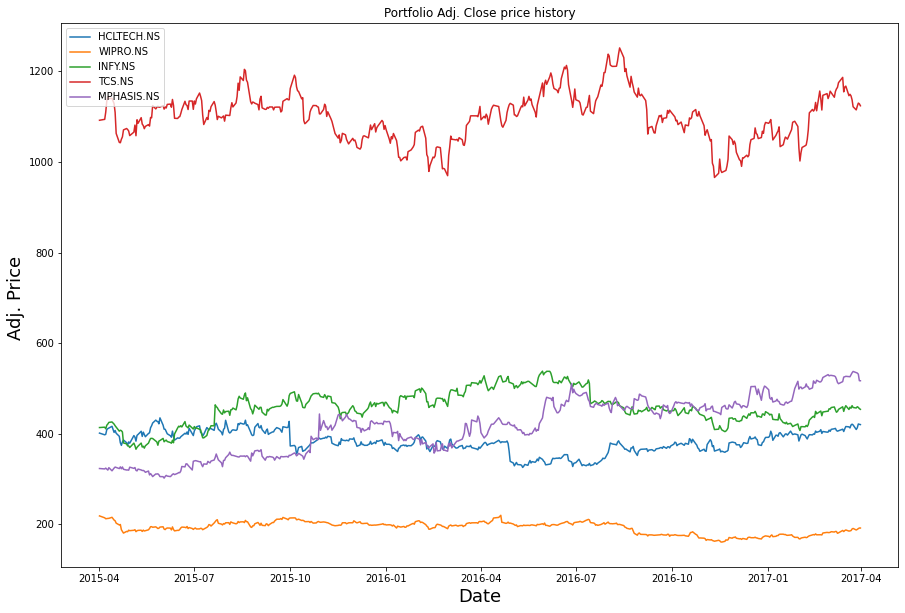

In [ ]:
# Visually show the stock/portfolio
title='Portfolio Adj. Close price history'

 #get stocks
my_stocks=df

 #create and plot the graph


plt.figure(figsize=(15,10))
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price ', fontsize=18)

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label=c)

plt.legend(my_stocks.columns.values, loc ='upper left')


**Returns for the portfolio**

In [ ]:
#show the daily simple return
returns = df.pct_change()
returns


,HCLTECH.NS,WIPRO.NS,INFY.NS,TCS.NS,MPHASIS.NS
Date,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN
2015-04-06,-0.009353,-0.019031,0.001956,0.001833,-0.002938
2015-04-07,0.002682,-0.009818,-0.008585,0.014800,0.005637
2015-04-08,0.026002,0.002033,0.019010,0.021818,-0.006370
2015-04-09,0.005528,0.001376,0.006566,0.008768,-0.007052
...,...,...,...,...,...
2017-03-27,-0.023939,-0.018024,-0.002472,-0.006238,-0.005058
2017-03-28,0.009095,0.007042,0.006123,0.007412,-0.001500
2017-03-29,0.020584,0.009263,-0.003188,0.006033,-0.004674


**Annual co-variance, variance, and volatility(risk) for the portfolio**

In [ ]:
#create and show the annual covariance matrix
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,HCLTECH.NS,WIPRO.NS,INFY.NS,TCS.NS,MPHASIS.NS
HCLTECH.NS,0.072096,0.024401,0.030026,0.022593,0.008497
WIPRO.NS,0.024401,0.041878,0.024506,0.019092,0.010169
INFY.NS,0.030026,0.024506,0.063622,0.024758,0.012407
TCS.NS,0.022593,0.019092,0.024758,0.047820,0.005020
MPHASIS.NS,0.008497,0.010169,0.012407,0.005020,0.100020


In [ ]:
#calculate the portfolio variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual, weights))
port_variance

0.02753491265621099

In [ ]:
#calculate the porfolio volatility aka std
port_volatility=np.sqrt(port_variance)
port_volatility

0.16593647174810905

In [ ]:
#calculate the annual portfolio return
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.08440886576311406

**The expected annual return, volatility(risk), and variance**

In [ ]:
#show the expected annual return, volatility(risk), and variance

percent_var = str(round(port_variance, 2)*100)+ '%'
percent_vols = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

print('Expected annual return : '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return : 8.0%
Annual volatility / risk: 17.0%
Annual variance: 3.0%


# **OPTIMIZATION**

In [ ]:
pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


**The optimized weights can be known from below**

In [ ]:
#Portfolio Optimization

#calculate the expected returns and the annualised sample covariance matrix of assets returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharp ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose =True)


OrderedDict([('HCLTECH.NS', 0.02767), ('WIPRO.NS', 0.0), ('INFY.NS', 0.12048), ('TCS.NS', 0.0), ('MPHASIS.NS', 0.85184)])
Expected annual return: 25.8%
Annual volatility: 27.7%
Sharpe Ratio: 0.86


(0.2583498617971865, 0.2769559379812932, 0.8606057105491116)

**Testing the optimized weights on the time period from 1st April 2017 to 31st March 2018**

In [ ]:
assets = ['HCLTECH.NS','WIPRO.NS','INFY.NS','TCS.NS','MPHASIS.NS']

stockStartDate='2017-04-01'

stockEndDate='2018-03-31'


In [ ]:
#create a df to store the adjusted close price 
df1 = pd.DataFrame()

#store the adj close price in df
for stock in assets:
  df1[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate,end = stockEndDate)['Adj Close']

In [ ]:
df1.sort_index(inplace=True)
df1

,HCLTECH.NS,WIPRO.NS,INFY.NS,TCS.NS,MPHASIS.NS
Date,,,,,
2017-04-03,415.872986,188.250473,447.701843,1114.899292,510.973145
2017-04-05,408.311554,189.568100,441.999084,1110.063721,506.071991
2017-04-06,409.751862,191.071823,443.618958,1109.518433,500.145935
2017-04-07,407.735504,190.032364,435.608337,1122.924927,493.729797
2017-04-10,399.934052,187.247650,423.115601,1119.771851,496.937897
...,...,...,...,...,...
2018-03-22,456.024414,214.861420,538.845947,1334.035156,774.797058
2018-03-23,469.182556,212.030884,541.769104,1327.806152,765.948242
2018-03-26,473.911591,204.097397,536.038574,1327.269165,759.896240


In [ ]:
optimized_weights = np.array([0.02767,0.0,0.12048,0.0,0.85184])

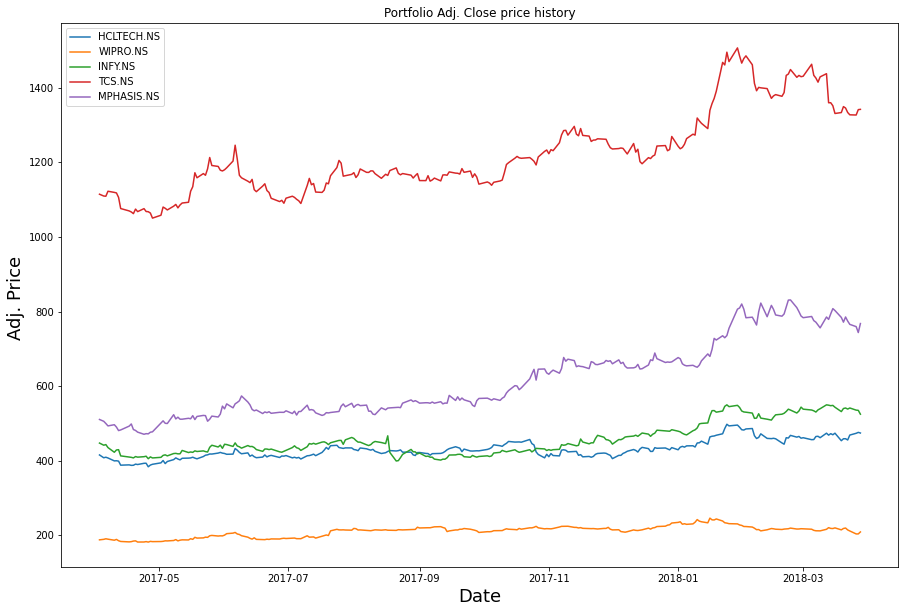

In [ ]:
# Visually show the stock/portfolio
title='Portfolio Adj. Close price history'

 #get stocks
my_stocks_1=df1

 #create and plot the graph


plt.figure(figsize=(15,10))
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price ', fontsize=18)

for c in my_stocks_1.columns.values:
  plt.plot(my_stocks_1[c], label=c)

plt.legend(my_stocks_1.columns.values, loc ='upper left')


In [ ]:
#show the daily simple return
returns1 = df1.pct_change()
returns1


,HCLTECH.NS,WIPRO.NS,INFY.NS,TCS.NS,MPHASIS.NS
Date,,,,,
2017-04-03,NaN,NaN,NaN,NaN,NaN
2017-04-05,-0.018182,0.006999,-0.012738,-0.004337,-0.009592
2017-04-06,0.003527,0.007932,0.003665,-0.000491,-0.011710
2017-04-07,-0.004921,-0.005440,-0.018057,0.012083,-0.012829
2017-04-10,-0.019134,-0.014654,-0.028679,-0.002808,0.006498
...,...,...,...,...,...
2018-03-22,-0.007255,-0.023031,-0.005310,-0.008891,-0.013946
2018-03-23,0.028854,-0.013174,0.005425,-0.004669,-0.011421
2018-03-26,0.010079,-0.037417,-0.010577,-0.000404,-0.007901


In [ ]:
#create and show the annual covariance matrix
cov_matrix_annual1=returns1.cov()*252
cov_matrix_annual1

,HCLTECH.NS,WIPRO.NS,INFY.NS,TCS.NS,MPHASIS.NS
HCLTECH.NS,0.041829,0.011655,0.016359,0.017536,0.007783
WIPRO.NS,0.011655,0.041132,0.010675,0.012176,0.000953
INFY.NS,0.016359,0.010675,0.051858,0.012720,0.004000
TCS.NS,0.017536,0.012176,0.012720,0.044841,0.006185
MPHASIS.NS,0.007783,0.000953,0.004000,0.006185,0.075037


In [ ]:
#calculate the portfolio variance
port_variance1 = np.dot(optimized_weights.T,np.dot(cov_matrix_annual1, optimized_weights))
port_variance1

0.05653062234806578

In [ ]:
#calculate the porfolio volatility aka std
port_volatility1=np.sqrt(port_variance1)
port_volatility1

0.23776169234774927

In [ ]:
#calculate the annual portfolio return
portfolioSimpleAnnualReturn1=np.sum(returns1.mean()*optimized_weights)*252
portfolioSimpleAnnualReturn1

0.41636897627193026

In [ ]:
#show the expected annual return, volatility(risk), and variance

percent_var1 = str(round(port_variance1, 2)*100)+ '%'
percent_vols1 = str(round(port_volatility1,2)*100)+'%'
percent_ret1 = str(round(portfolioSimpleAnnualReturn1,2)*100)+'%'

print('Expected annual return : '+ percent_ret1)
print('Annual volatility / risk: '+ percent_vols1)
print('Annual variance: '+ percent_var1)

Expected annual return : 42.0%
Annual volatility / risk: 24.0%
Annual variance: 6.0%
